#### Imports

In [1]:
from sympy import Symbol, diff
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x_symbol = Symbol('x')

#### Functions

In [2]:
f = [
  lambda x: np.power(x,10) - 1, 
  lambda x: np.exp(x) - 3 * x, 
  lambda x: np.power(x,3) - (9 * x) + 5,
  lambda x: 2 * np.power(x,3) + (5 * np.power(x,2)) - (8 * x) - 1,
  lambda x: 3 * np.power(x,2) - 9,
  lambda x: np.power(x,3) - (9 * x) + 3,
  lambda x: np.power(x,2) + x - 6
  ]


##### Auxiliar Function

In [3]:
def plot_func(f, x_min, x_max, n, points):
  x = np.linspace(x_min, x_max, n)
  y = np.array([f(i) for i in x])
  plt.figure(dpi=120)
  plt.plot(x, y)
  plt.plot(points.iloc[:, 0], points.iloc[:, 1], 'ro')
  plt.grid(True)
  plt.show()

def eval_derivate(f, x):
  return float(diff(f(x_symbol), x_symbol).subs(x_symbol, x))

#### Root-finding algorithms

##### Bissection Method

In [96]:
def bissec(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a + b) / 2

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': M, 'f(a)*f(x)': f(a)*f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = (a + b) / 2
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x), 'f(a)': f(a), 'f(a)*f(x)': f(a)*f(x)}, ignore_index=True)
    k += 1

  print('Bissection Method')
  plot_func(f, df['a'][0], df['b'][0], 100, df[['x', 'f(x)']])

  return df
 

##### False Position Method

In [59]:
def false_position(a, b, precision, iterations, f):

  if f(a) * f(b) >= 0:
    print('Invalid interval')
    return None
  
  k = 1
  M = f(a)
  x = (a * f(b)) - (b * f(a)) / (f(b) - f(a))

  initial_data = {'a': a, 'b': b, 'x': x, 'f(x)': f(x)}
  df = pd.DataFrame(initial_data, index=[1])

  while k < iterations and abs(f(x)) > precision:
    if M * f(x) > 0:
      a = x
      M = f(a)
    else:
      b = x

    x = a * f(b) - b * f(a) / (f(b) - f(a))
    df = df.append({'a': a, 'b': b, 'x': x, 'f(x)': f(x)}, ignore_index=True)

    k += 1
    
  print('False Position Method')
  plot_func(f, df['a'][0], df['b'][0], 100, df[['x', 'f(x)']])
  
  return df

##### Newton Raphson

In [60]:
def newton_raphson(x0, precision, iterations, f, x_min, x_max):
  initial_data = {'x(n)': x0, 'f(x(n))': f(x0)}
  df = pd.DataFrame(initial_data, index=[1])
  
  if abs(f(x0)) < precision:
    return df

  x = x0 - f(x0) / eval_derivate(f, x0)
  df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)

  k = 1

  while k < iterations and abs(f(x)) > precision:
    x = x - f(x) / eval_derivate(f, x0)
    df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)
    k += 1

  print('Newton Raphson Method')
  plot_func(f, x_min, x_max, 100, df.iloc[:, [0, 1]])
  
  return df

##### Secant

In [61]:
def secant(x0, x1, precision, iterations, f, x_min, x_max):
  initial_data = {'x(n)': x0, 'f(x(n))': f(x0)}

  df = pd.DataFrame(initial_data, index=[1])
  df = df.append({'x(n)': x1, 'f(x(n))': f(x1)}, ignore_index=True)
  
  if abs(f(x0)) < precision or abs(f(x1)) < precision:
    return df

  x = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))

  df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)

  k = 1

  while k < iterations and abs(f(x)) > precision:
    x0 = x1
    x1 = x

    x = x1 - ((f(x1) * (x1 - x0)) / (f(x1) - f(x0)))
    df = df.append({'x(n)': x, 'f(x(n))': f(x)}, ignore_index=True)
    k += 1

  print('Secant Method')
  plot_func(f, x_min, x_max, 100, df.iloc[:, [0, 1]])
  
  return df

#### Comparative Function

In [67]:
def compare(func, precision, iterations, a, b, x0, x1, x_min, x_max):
  res1 = bissec(a, b, precision, iterations, func)
  res2 = false_position(a, b, precision, iterations, func)
  res3 = newton_raphson(x0, precision, iterations, func, x_min, x_max)
  res4 = secant(x0, x1, precision, iterations, func, x_min, x_max)

  initial_data = {
    'Bisseção': f'[{a},{b}]', 
    'Falsa Posição': f'[{a},{b}]', 
    'Newton-Raphson': f'x0 = {x0}', 
    'Secante': f'x0 = {x0}, x1 = {x1}'
    }

  df = pd.DataFrame(initial_data, index=[0])

  # Root
  df = df.append({
    'Bisseção': res1.iloc[-1]['x'], 
    'Falsa Posição': res2.iloc[-1]['x'], 
    'Newton-Raphson': res3.iloc[-1]['x(n)'],
    'Secante': res4.iloc[-1]['x(n)']},
    ignore_index = True)

  # f(x)
  df = df.append({
    'Bisseção': res1.iloc[-1]['f(x)'], 
    'Falsa Posição': res2.iloc[-1]['f(x)'], 
    'Newton-Raphson': res3.iloc[-1]['f(x(n))'],
    'Secante': res4.iloc[-1]['f(x(n))']},
    ignore_index = True)

  # iterations
  df = df.append({
    'Bisseção': len(res1), 
    'Falsa Posição': len(res2), 
    'Newton-Raphson': len(res3),
    'Secante': len(res4)},
    ignore_index = True)

  df.rename(index={0: 'Dados Iniciais', 1: 'Raíz', 2: 'f(x)', 3: 'Nº de Iterações'}, inplace=True)

  return df

#### Results

##### f(x) = x^3 - (9 * x) + 3

Bissection Method


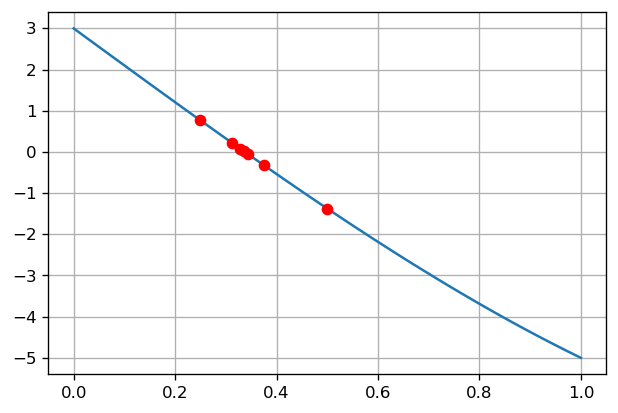

False Position Method


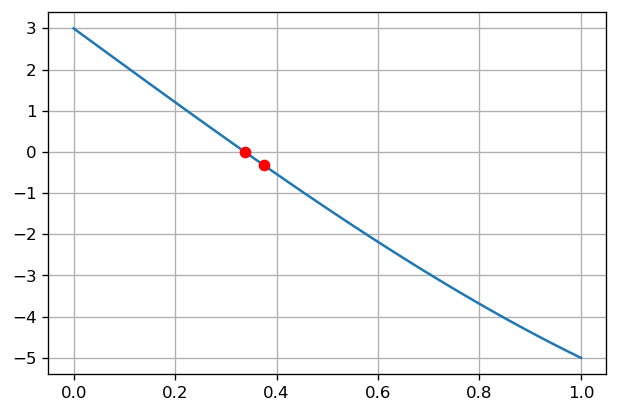

Newton Raphson Method


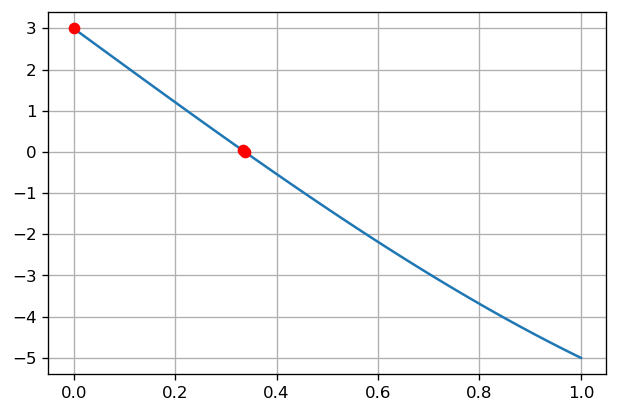

Secant Method


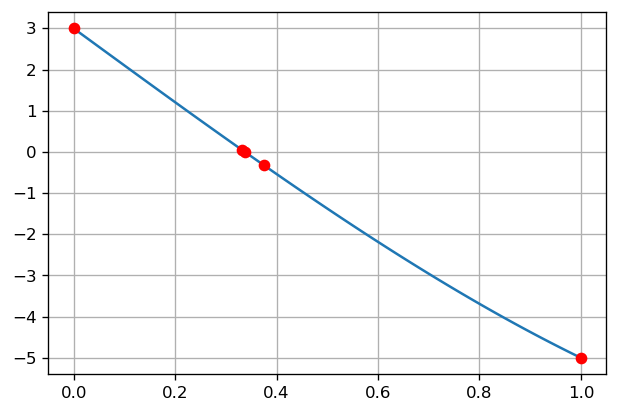

,Bisseção,Falsa Posição,Newton-Raphson,Secante
Dados Iniciais,"[0,1]","[0,1]",x0 = 0,"x0 = 0, x1 = 1"
Raíz,0.335938,0.338624,0.337449,0.337635
f(x),0.014474,-0.00879,0.001389,-0.000222
Nº de Iterações,7,2,3,5


In [68]:
compare(f[5], 0.01, 7, 0, 1, 0, 1, 0, 1)

Na função x^3 - (9 * x) + 3, utilizando o número máximo de 7 iterações e precisão de 0.01, observando o número de iterações necessárias para alcançar a raiz aproximada, percebemos que a bisseção é o método que utilizou o número máximo de iterações e, ainda sim, não chegou na precisão definida, já o método que utilizou o menor número de iterações foi o método da falsa posição.

Em termos de complexidade, os dois primeiros métodos possuem complexidade menor que o Newton-Raphson e a Secante, pois apenas calculam o valor na função, tomando como base os valores iniciais e vão mudando as variáveis a e b conforme o resultado. Já no método do Newton-Raphson temos uma complexidade maior no cálculo da derivada, porém é necessário apenas um argumento (x0) para que possamos começar a aproximação e utilizando derivadas, conseguimos alcançar com mais facilidade um resultado melhor (com erro absoluto menor). Por fim a secante é um método igualmente preciso - nesse caso mais preciso inclusive que os outros - que acaba evitando utilizar a derivada e, portanto, tem uma complexidade menor.

##### f(x) = x^2 + x - 6

Bissection Method


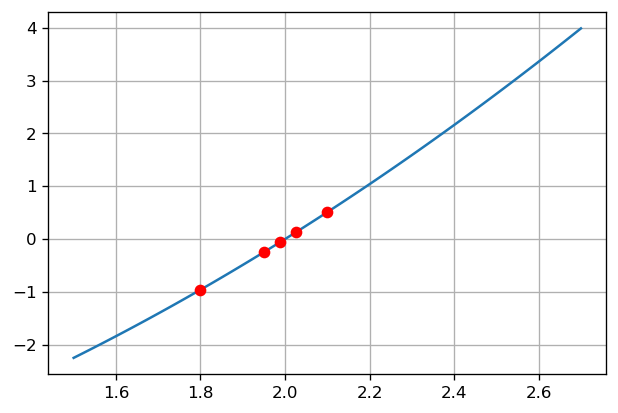

False Position Method


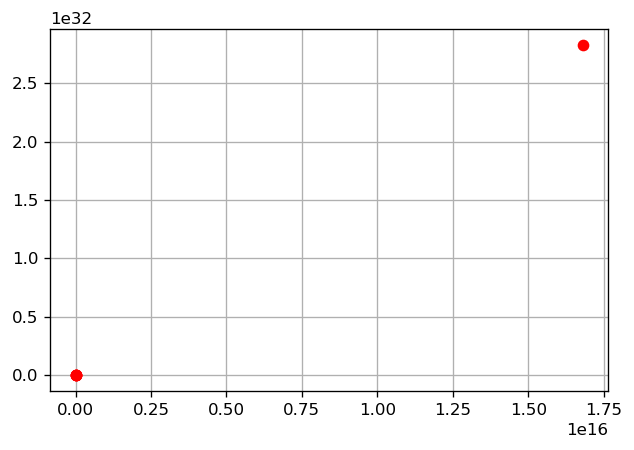

Newton Raphson Method


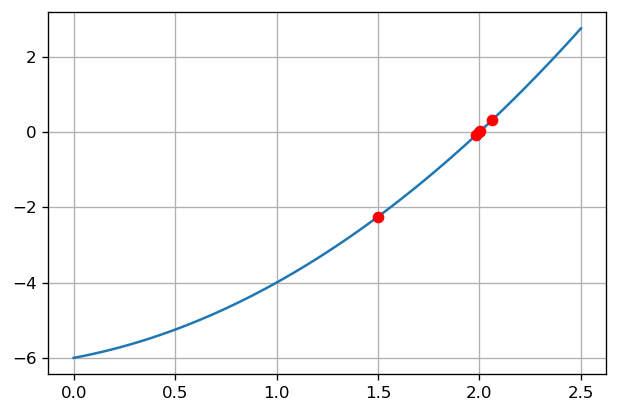

Secant Method


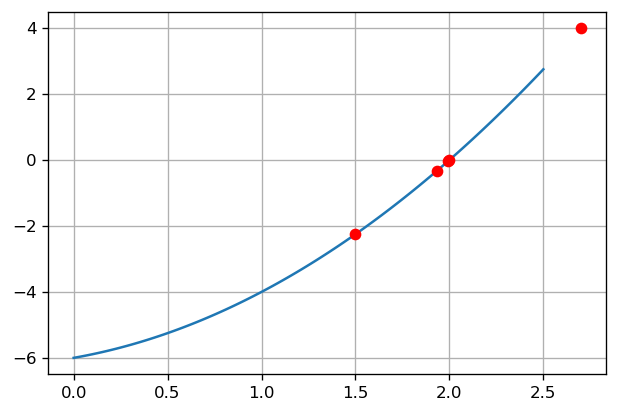

,Bisseção,Falsa Posição,Newton-Raphson,Secante
Dados Iniciais,"[1.5,2.7]","[1.5,2.7]",x0 = 1.5,"x0 = 1.5, x1 = 2.7"
Raíz,1.9875,16804658628056680.0,1.998975,2.000114
f(x),-0.062344,282396551605519819205919893356544.0,-0.005122,0.000572
Nº de Iterações,5,5,5,5


In [99]:
compare(f[6], 0.01, 5, 1.5, 2.7, 1.5, 2.7, 0, 2.5)

Na função x^2 + x - 6 novamente percebemos que o método da secante parece ser mais preciso juntamente com o método de Newton-Raphson, porém com complexidades maiores que o método da Bisseção e da Falsa Posição. Nessa função todos os métodos utilizaram o número máximo de iterações.